In [1]:
import sys

In [2]:
!{sys.executable} -m pip install -r ../requirements.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

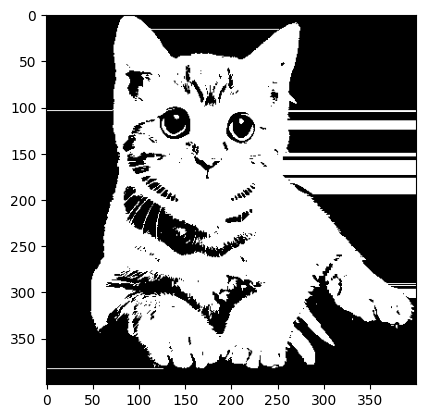

In [14]:
# MORPHOLOGY - manipulations on binary (i.e. thresholded grayscale) images
img = cv2.imread("../cat.png", cv2.IMREAD_GRAYSCALE)
threshold = 127
_, thresholded_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_img, cmap='gray')

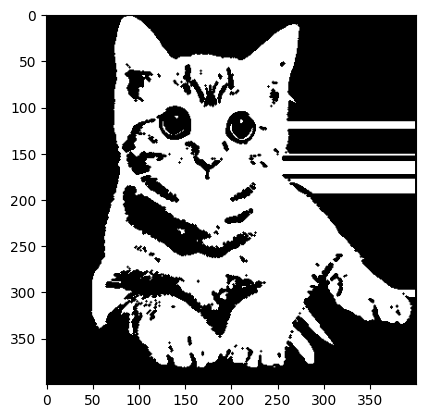

In [16]:
# 1. Erosion (each center pixel stays only if the structuring element completely lies in white pixels)
def erode(img, structuring_element=[[0,1,0],[1,1,1],[0,1,0]]):
    H, W = img.shape
    se_h, se_w = len(structuring_element), len(structuring_element[0])
    pad_h, pad_w = se_h // 2, se_w // 2

    # Pad the image to handle border pixels
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    eroded_img = np.zeros_like(img)

    for i in range(H):
        for j in range(W):
            # Extract the region of interest
            roi = padded_img[i:i+se_h, j:j+se_w]
            # Apply erosion: check if structuring element fits completely
            if np.array_equal(roi & structuring_element, structuring_element):
                eroded_img[i, j] = 255  # Set pixel to white
            else:
                eroded_img[i, j] = 0  # Set pixel to black

    return eroded_img

# Apply erosion on the thresholded image
eroded_img = erode(thresholded_img)
plt.imshow(eroded_img, cmap='gray')

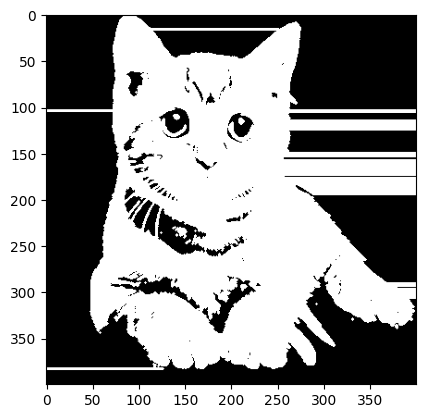

In [17]:
# 2. Dilation (each center pixel stays only if the structuring element intersects a white pixel)
def dilate(img, structuring_element=[[0,1,0],[1,1,1],[0,1,0]]):
    H, W = img.shape
    se_h, se_w = len(structuring_element), len(structuring_element[0])
    pad_h, pad_w = se_h // 2, se_w // 2

    # Pad the image to handle border pixels
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    dilated_img = np.zeros_like(img)

    for i in range(H):
        for j in range(W):
            # Extract the region of interest
            roi = padded_img[i:i+se_h, j:j+se_w]
            # Apply dilation: check if structuring element intersects
            if np.any(roi & structuring_element):
                dilated_img[i, j] = 255  # Set pixel to white
            else:
                dilated_img[i, j] = 0  # Set pixel to black

    return dilated_img

# Apply dilation on the thresholded image
dilated_img = dilate(thresholded_img)
plt.imshow(dilated_img, cmap='gray')

In [26]:
# Opening removes noise but keeps the general shape by applying erosion then dilation
def opening(img, structuring_element=[[1,1,1],[1,1,1],[1,1,1]]):
    return dilate(erode(img, structuring_element), structuring_element)

opening_img = opening(img)

# Closing closes small gaps or holes by applying dilation then erosion
def closing(img, structuring_element=[[1,1,1],[1,1,1],[1,1,1]]):
    return erode(dilate(img, structuring_element), structuring_element)

closing_img = closing(img)

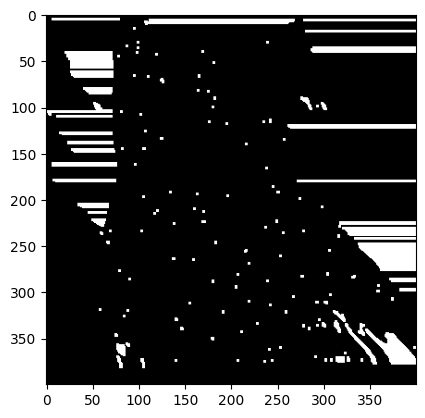

In [27]:
# Opening applied to image
plt.imshow(opening_img, cmap='gray')

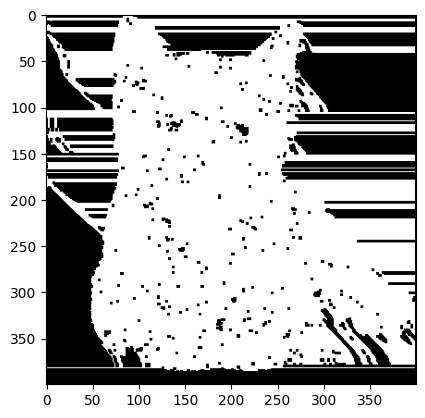

In [28]:
# Closing applied to image
plt.imshow(closing_img, cmap='gray')